In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# load audio file
audio_path = "audio/piano_c.wav"
signal, sr = librosa.load(audio_path)



In [2]:
len(signal)

33968

In [4]:
# duration of each sample is inverse of sr
duration = 1/sr
duration

4.5351473922902495e-05

In [6]:
# duration of a cycle of our fundamental frequency
d_523 = 1/523
d_523

0.0019120458891013384

In [7]:
# Check 400 samples
duration_4000_samples = 400 * duration
duration_4000_samples

0.018140589569160998

In [8]:
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)
t

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       1.54036281e+00, 1.54040816e+00, 1.54045351e+00])

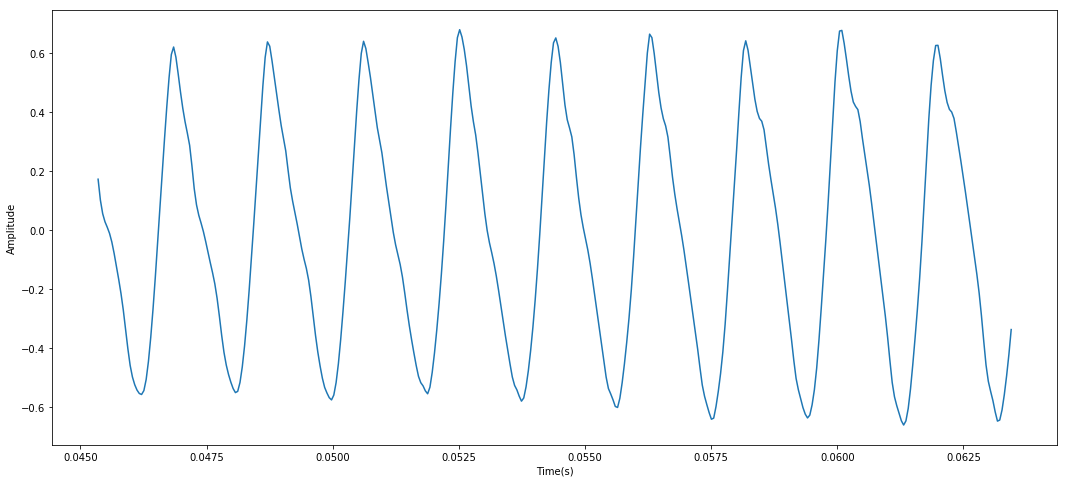

In [10]:
plt.figure(figsize=(18, 8))
plt.plot(t[1000:1400], signal[1000:1400])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()
# Aim Compare this signal against sinusoids with different frequencies

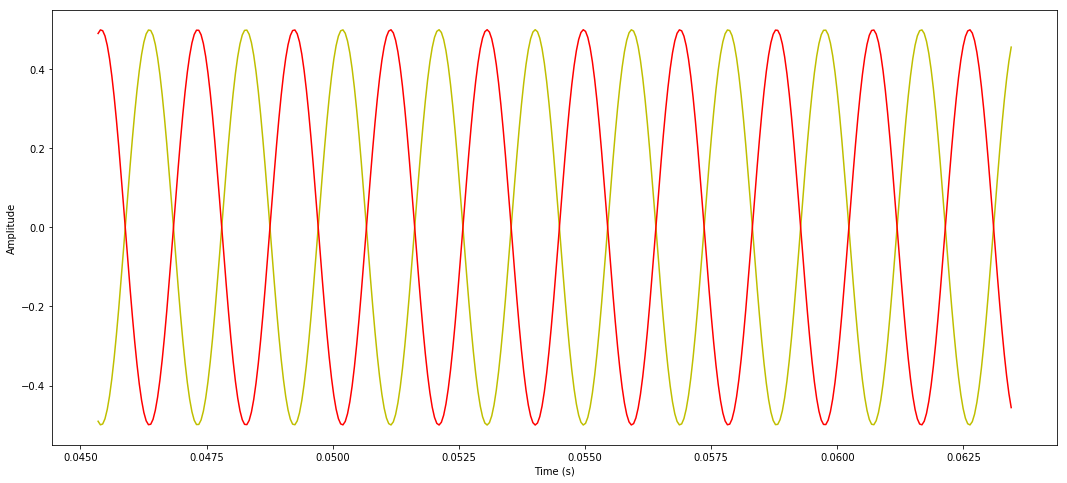

In [18]:
f_fundamental = 523
phase1 = 0
phase2 = 0.5 # totally opposite phase, if = 1, aligned again
sin_wave1 = 0.5 * np.sin(2*np.pi*(f_fundamental*t - phase1))
sin_wave2 = 0.5 * np.sin(2*np.pi*(f_fundamental*t - phase2))

plt.figure(figsize=(18,8))
plt.plot(t[1000:1400], sin_wave1[1000:1400], color="y")
plt.plot(t[1000:1400], sin_wave2[1000:1400], color="r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

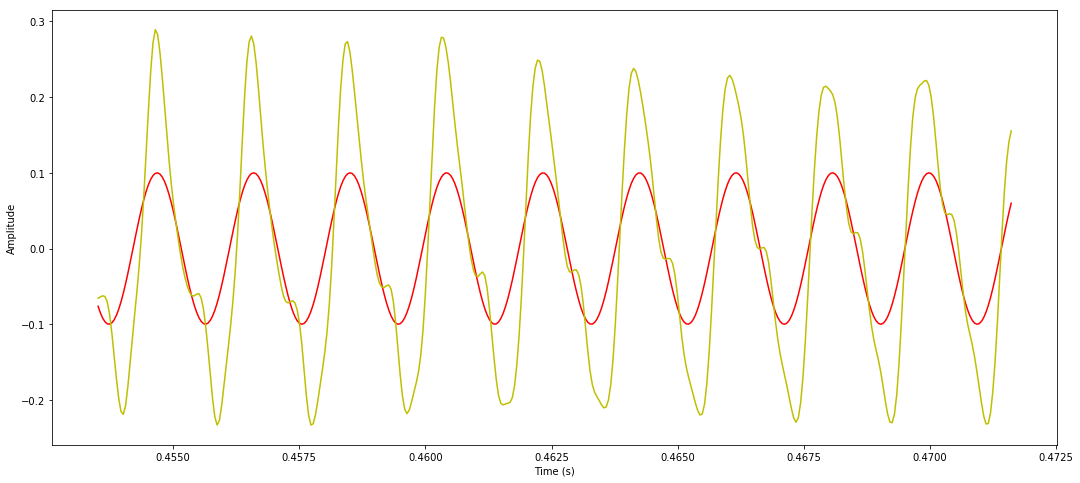

In [23]:
# compare signal and sine wave
f_fundamental = 523
phase = 0.55
sin_wave = 0.1 * np.sin(2*np.pi*(f_fundamental*t - phase))
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin_wave[10000:10400], color="r")
plt.plot(t[10000:10400], signal[10000:10400], color="y")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# calculate similarity
# Multiply the 2 signals, add positive area and subtract negative area

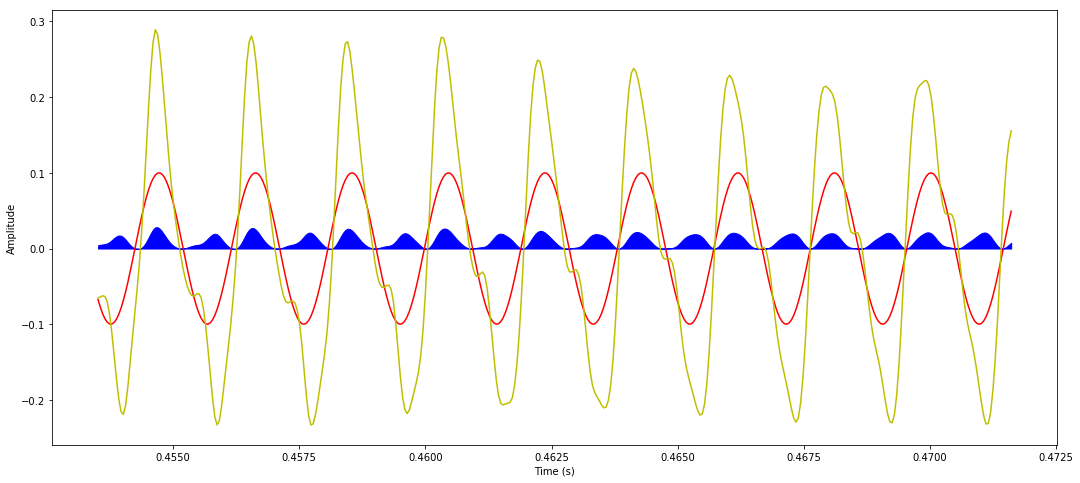

In [25]:
# compare signal and sine wave
f_fundamental = 523
phase = 0.57
sin_wave = 0.1 * np.sin(2*np.pi*(f_fundamental*t - phase))
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin_wave[10000:10400], color="r")
plt.plot(t[10000:10400], signal[10000:10400], color="y")
plt.fill_between(t[10000:10400], sin_wave[10000:10400]*signal[10000:10400], color="b")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
# the higher the area, the higher the similarity